##Intro

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation

/content/drive/MyDrive/MLsec_project/BiasMitigation


In [3]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation


In [4]:
!git clone https://github.com/pliang279/LM_bias.git

fatal: destination path 'LM_bias' already exists and is not an empty directory.


In [5]:
%cd LM_bias/

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias


In [6]:
!ls

data  images  LICENSE  nlg-bias  nullspace_projection  README.md  res  src


In [7]:
%cd src

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src


In [8]:
!ls

data_preprocess  global_bias  local_bias


In [9]:
%cd data_preprocess/

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess


In [10]:
!ls

context_nullspace_projection.py  gpt2_bias_direction.npy
data_preprocess.py		 gpt2_bias_subspace.npy
embeddings..png


In [11]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess


###Identify Tokens corresponding to gender from gpt2 embeddings

In [12]:
#threshold_male, threshold_female = 0.24, 0.25
!python data_preprocess.py --embed_source gpt2 --by_pca True --num_components 5 --save_subspace False 

pca explained variance ratio:  [0.3658576  0.19249536 0.13060503 0.09610862 0.08203769 0.03778473
 0.02715391 0.02396387 0.0225765  0.01831487]
top 100 male tokens: ('Ġhis', 'Ġhe', 'ĠHe', 'Ġman', 'Ġguy', 'He', 'ĠHis', 'Ġhim', 'His', 'Ġhimself', 'Ġson', 'Ġguys', 'ĠJohn', 'ĠMr', 'his', 'Ġboy', 'man', 'Ġfather', 'ĠMike', 'Ġmen', 'guy', 'Ġthe', 'Mr', 'ĠDavid', 'ĠMan', 'Ġbrother', 'Ġdude', 'Ġbeard', 'ĠRichard', 'ĠEric', 'Ġdad', 'ĠJr', 'ĠHE', 'ĠSteve', 'Ġin', 'ĠPaul', 'ĠJoe', 'Ġa', 'ĠKevin', 'Ġbrothers', 'ĠMark', 'ĠMichael', 'ĠAdam', 'Ġplayers', 'ĠChris', 'ĠJames', 'ĠDave', 'ĠGuy', 'ĠDude', 'he', 'ĠDaniel', 'Ġ"', 'itus', 'ĠMatt', 'ĠJason', 'ĠRyan', 'Ġof', 'Man', ',', 'ĠJonathan', 'Ġand', 'ĠR', 'Ġon', 'ĠFather', 'ĠRick', 'Ġplayer', 'ĠHIS', 'Ġ(', 'ĠSteven', 'Ġone', 'Ġis', 'Ġchairman', 'ĠCharles', 'ĠJustin', 'Ġmustache', 'Mike', 'John', 'Ġto', '.', 'ĠJ', '-', 'Ġit', 'ĠThomas', 'ĠTom', 'ĠPeter', 'son', 'Ġthat', 'Ġall', 'ĠCarlos', 'ĠBen', 'Ġthis', 'Ġhas', 'Ġjust', 'ĠAaron', 'Ġfor', 'ĠJeff', 'ĠThe

In [13]:
#threshold_male, threshold_female = 0.14, 0.15
!python data_preprocess.py --embed_source gpt2 --by_pca True --num_components 5 --save_subspace False 

pca explained variance ratio:  [0.3658576  0.19249536 0.13060503 0.09610862 0.08203769 0.03778473
 0.02715391 0.02396387 0.0225765  0.01831487]
top 100 male tokens: ('Ġhis', 'Ġhe', 'ĠHe', 'Ġman', 'Ġguy', 'He', 'ĠHis', 'Ġhim', 'His', 'Ġhimself', 'Ġson', 'Ġguys', 'ĠJohn', 'ĠMr', 'his', 'Ġboy', 'man', 'Ġfather', 'ĠMike', 'Ġmen', 'guy', 'Ġthe', 'Mr', 'ĠDavid', 'ĠMan', 'Ġbrother', 'Ġdude', 'Ġbeard', 'ĠRichard', 'ĠEric', 'Ġdad', 'ĠJr', 'ĠHE', 'ĠSteve', 'Ġin', 'ĠPaul', 'ĠJoe', 'Ġa', 'ĠKevin', 'Ġbrothers', 'ĠMark', 'ĠMichael', 'ĠAdam', 'Ġplayers', 'ĠChris', 'ĠJames', 'ĠDave', 'ĠGuy', 'ĠDude', 'he', 'ĠDaniel', 'Ġ"', 'itus', 'ĠMatt', 'ĠJason', 'ĠRyan', 'Ġof', 'Man', ',', 'ĠJonathan', 'Ġand', 'ĠR', 'Ġon', 'ĠFather', 'ĠRick', 'Ġplayer', 'ĠHIS', 'Ġ(', 'ĠSteven', 'Ġone', 'Ġis', 'Ġchairman', 'ĠCharles', 'ĠJustin', 'Ġmustache', 'Mike', 'John', 'Ġto', '.', 'ĠJ', '-', 'Ġit', 'ĠThomas', 'ĠTom', 'ĠPeter', 'son', 'Ġthat', 'Ġall', 'ĠCarlos', 'ĠBen', 'Ġthis', 'Ġhas', 'Ġjust', 'ĠAaron', 'Ġfor', 'ĠJeff', 'ĠThe

In [14]:
#threshold_male, threshold_female = 0.10, 0.18
!python data_preprocess.py --embed_source gpt2 --by_pca True --num_components 5 --save_subspace False 

pca explained variance ratio:  [0.3658576  0.19249536 0.13060503 0.09610862 0.08203769 0.03778473
 0.02715391 0.02396387 0.0225765  0.01831487]
top 100 male tokens: ('Ġhis', 'Ġhe', 'ĠHe', 'Ġman', 'Ġguy', 'He', 'ĠHis', 'Ġhim', 'His', 'Ġhimself', 'Ġson', 'Ġguys', 'ĠJohn', 'ĠMr', 'his', 'Ġboy', 'man', 'Ġfather', 'ĠMike', 'Ġmen', 'guy', 'Ġthe', 'Mr', 'ĠDavid', 'ĠMan', 'Ġbrother', 'Ġdude', 'Ġbeard', 'ĠRichard', 'ĠEric', 'Ġdad', 'ĠJr', 'ĠHE', 'ĠSteve', 'Ġin', 'ĠPaul', 'ĠJoe', 'Ġa', 'ĠKevin', 'Ġbrothers', 'ĠMark', 'ĠMichael', 'ĠAdam', 'Ġplayers', 'ĠChris', 'ĠJames', 'ĠDave', 'ĠGuy', 'ĠDude', 'he', 'ĠDaniel', 'Ġ"', 'itus', 'ĠMatt', 'ĠJason', 'ĠRyan', 'Ġof', 'Man', ',', 'ĠJonathan', 'Ġand', 'ĠR', 'Ġon', 'ĠFather', 'ĠRick', 'Ġplayer', 'ĠHIS', 'Ġ(', 'ĠSteven', 'Ġone', 'Ġis', 'Ġchairman', 'ĠCharles', 'ĠJustin', 'Ġmustache', 'Mike', 'John', 'Ġto', '.', 'ĠJ', '-', 'Ġit', 'ĠThomas', 'ĠTom', 'ĠPeter', 'son', 'Ġthat', 'Ġall', 'ĠCarlos', 'ĠBen', 'Ġthis', 'Ġhas', 'Ġjust', 'ĠAaron', 'Ġfor', 'ĠJeff', 'ĠThe

File stored in /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess/gpt2_bias_direction.npy

File stored in /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess/gpt2_bias_subspace.npy


###Train the bias classifier and learn the projection matrix P

In [15]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess


In [16]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.7 MB/s 
     |████████████████████████████████| 7.6 MB 78.0 MB/s 
     |████████████████████████████████| 182 kB 74.1 MB/s 


In [17]:
!python context_nullspace_projection.py

2022-12-10 19:17:30.416995: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Downloading: 100% 1.04M/1.04M [00:00<00:00, 5.79MB/s]
Downloading: 100% 456k/456k [00:00<00:00, 3.25MB/s]
Downloading: 100% 665/665 [00:00<00:00, 608kB/s]
Downloading: 100% 548M/548M [00:33<00:00, 16.2MB/s]
The number of the dataset (male, female, neut):  (13870,) (7581,) (9000,)
Split the dataset
Train size: 2940; Dev size: 1260; Test size: 1800
iteration: 79, accuracy: 0.35: 100% 80/80 [05:13<00:00,  3.91s/it]
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning ra

Projection matrix is stored in /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/data/saved_P/P.npy

##Evaluate Local Bias existing in gpt2:

In [18]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/data_preprocess


In [19]:
%cd ../

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src


In [20]:
%cd local_bias/

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/local_bias


In [21]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/local_bias


In [22]:
!ls

__init__.py  measure_local_bias.py  __pycache__  utils.py


In [23]:
!python measure_local_bias.py

2022-12-10 19:26:57.360152: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
../../res/local_res/
----------------------------------------------------------------------------------------------------
### Local Metric1: Top k overlap - reflect language model performance ###
**simple template**
avg: [0.005620650131075447, 0.0034352611354439835, 0.0021281572916674535, 0.0013143913607383804, 0.0007964259825407381, 0.0004643251249233423, 0.00025316654920514147, 0.00012282283393084305, 4.757808788150677e-05, 1.0461577015355767e-05, 2.3115100014199804e-15]
subspace: 1.6753875051860724e-05
direction: 1.4537915395591952e-05

(25,)
**own corpus**
avg: [0.004629401550055876, 0.0029393440187172274, 0.0018774267414010284, 0.0011893559523028117, 0.0007364063534296482, 0.00043743942140469

File stored in /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/res/local_res/res.txt


##Evaluate Global Bias Existing in gpt2:

In [24]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias


In [25]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/global_bias

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/global_bias


In [26]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/src/global_bias


In [27]:
!ls

generate_full_sentence.py  __init__.py


In [34]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)


In [36]:
!python -m pip uninstall transformers

Found existing installation: transformers 4.25.1
Uninstalling transformers-4.25.1:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.8/dist-packages/transformers-4.25.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/transformers/*
Proceed (y/n)? y
  Successfully uninstalled transformers-4.25.1


In [37]:
!pip install transformers==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 660 kB 4.5 MB/s 
     |████████████████████████████████| 7.5 MB 74.0 MB/s 
     |████████████████████████████████| 1.3 MB 76.5 MB/s 
     |████████████████████████████████| 880 kB 79.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=04957705f6b68b2f872979495e8f2687a6e9b07c45e009771f02bb3e2e67eaf3
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2


In [38]:
!python generate_full_sentence.py --algorithm INLP

2022-12-10 20:14:18.129299: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Downloading: 100% 1.04M/1.04M [00:00<00:00, 6.73MB/s]
Downloading: 100% 456k/456k [00:00<00:00, 3.97MB/s]
Downloading: 100% 665/665 [00:00<00:00, 598kB/s]
Downloading: 100% 548M/548M [00:09<00:00, 54.8MB/s]
../../res/global_res/
ratio: 0.75
Traceback (most recent call last):
  File "generate_full_sentence.py", line 321, in <module>
    generate_sentences(tokenizer, model, embedding, P, device, args.algorithm, f)
  File "generate_full_sentence.py", line 211, in generate_sentences
    scores = model.postprocess_next_token_scores(
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 1265, in __getattr__
    raise AttributeError("'{}' object has no attribute '{}'".format(
A

##Word Vector Debiasing:

In [11]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection


In [12]:
!python src/data/to_word2vec_format.py data/embeddings/glove.42B.300d.txt

In [13]:
!python src/data/filter_vecs.py \
--input-path data/embeddings/glove.42B.300d.txt \
--output-dir data/embeddings/ \
--top-k 150000  \
--keep-inherently-gendered  \
--keep-names 

tcmalloc: large alloc 2300993536 bytes == 0x3d80000 @  0x7f26ba94d001 0x7f26b783222f 0x7f26b788a68b 0x7f26b788b4f7 0x7f26b792d913 0x5aae14 0x49abe4 0x55d078 0x5d8941 0x49abe4 0x4fd8b5 0x49abe4 0x55cd91 0x5d8941 0x49abe4 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630 0x6426ae 0x644b78 0x64511c 0x677e5e 0x678029 0x7f26ba548c87 0x5e1baa
1917494it [00:49, 38676.67it/s]
tcmalloc: large alloc 1312202752 bytes == 0x978a2000 @  0x7f26ba94b1e7 0x7f26b783214e 0x7f26b78900b5 0x7f26b78906f9 0x7f26b793139f 0x5aae14 0x4997c7 0x5d8868 0x4990ca 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630 0x6426ae 0x644b78 0x64511c 0x677e5e 0x678029 0x7f26ba548c87 0x5e1baa
150000it [00:28, 5264.11it/s]
473it [00:00, 3075.50it/s]


In [14]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [15]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [16]:
import sys
sys.path.append("../src")
sys.path.append("../data/embeddings")
import classifier
import debias
#import debias_old as debias
import gensim
import codecs
import json
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
import numpy as np
import random
import sklearn
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import scipy
from scipy import linalg
from scipy.stats.stats import pearsonr
import tqdm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['agg.path.chunksize'] = 10000
from sklearn.utils import shuffle

#import warnings
#warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
def tsne(vecs, labels, title="", ind2label = None, words = None, metric = "l2"):

  tsne = TSNE(n_components=2)#, angle = 0.5, perplexity = 20)
  vecs_2d = tsne.fit_transform(vecs)
  label_names = sorted(list(set(labels.tolist())))
  num_labels = len(label_names)

  names = sorted(set(labels.tolist()))

  plt.figure(figsize=(6, 5))
  colors = "red", "blue"
  for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
     plt.scatter(vecs_2d[labels == i, 0], vecs_2d[labels == i, 1], c=c,
                label=label if ind2label is None else ind2label[label], alpha = 0.3, marker = "s" if i==0 else "o")
     plt.legend(loc = "upper right")

  plt.title(title)
  plt.savefig("embeddings.{}.png".format(title), dpi=600)
  plt.show()
  return vecs_2d

In [18]:
def load_word_vectors(fname):
    
    model = KeyedVectors.load_word2vec_format(fname, binary=False)
    vecs = model.vectors
    words = list(model.vocab.keys())
    return model, vecs, words

def project_on_gender_subspaces(gender_vector, model: Word2VecKeyedVectors, n = 2500):
    
    group1 = model.similar_by_vector(gender_vector, topn = n, restrict_vocab=None)
    group2 = model.similar_by_vector(-gender_vector, topn = n, restrict_vocab=None)
    
    all_sims = model.similar_by_vector(gender_vector, topn = len(model.vectors), restrict_vocab=None)
    eps = 0.03
    idx = [i for i in range(len(all_sims)) if abs(all_sims[i][1]) < eps]
    samp = set(np.random.choice(idx, size = n))
    neut = [s for i,s in enumerate(all_sims) if i in samp]
    return group1, group2, neut

def get_vectors(word_list: list, model: Word2VecKeyedVectors):
    
    vecs = []
    for w in word_list:
        
        vecs.append(model[w])
    
    vecs = np.array(vecs)

    return vecs
    
def get_bias_by_neighbors(model, v, gender_direction, topn): 
    
    neighbors = model.similar_by_vector(v, topn = topn) 
    neighbors_words = [n for n, _ in neighbors]
    
    #bias = len([n for n in neighbors_words if n in gendered_words])
    bias = len([n for n in neighbors_words if model.cosine_similarities(model[n], [gender_direction])[0] > 0])
    bias /= (1.*topn)
    return bias


def save_in_word2vec_format(vecs: np.ndarray, words: np.ndarray, fname: str):


    with open(fname, "w", encoding = "utf-8") as f:

        f.write(str(len(vecs)) + " " + "300" + "\n")
        for i, (v,w) in tqdm.tqdm_notebook(enumerate(zip(vecs, words))):

            vec_as_str = " ".join([str(x) for x in v])
            f.write(w + " " + vec_as_str + "\n")

###Load Word vectors

In [19]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [20]:
# 150k top vectors (with gender-typical words) - used for training

model, vecs, words = load_word_vectors(fname = "../data/embeddings/vecs.filtered.txt")

# only gendered vectors

model_gendered, _, _ = load_word_vectors(fname = "../data/embeddings/vecs.gendered.txt")

###Collect Biased Words

In [21]:
num_vectors_per_class = 7500

by_pca = False
if by_pca:
    pairs = [("male", "female"), ("masculine", "feminine"), ("he", "she"), ("him", "her")]
    gender_vecs = [model[p[0]] - model[p[1]] for p in pairs]
    pca = PCA(n_components=1)
    pca.fit(gender_vecs)
    gender_direction = pca.components_[0]
    
else:
    gender_direction = model["he"]-model["she"] 


gender_unit_vec = gender_direction/np.linalg.norm(gender_direction)
masc_words_and_scores, fem_words_and_scores, neut_words_and_scores = project_on_gender_subspaces(gender_direction, model, n = num_vectors_per_class)

masc_words, masc_scores = list(zip(*masc_words_and_scores))
neut_words, neut_scores = list(zip(*neut_words_and_scores))
fem_words, fem_scores = list(zip(*fem_words_and_scores))
masc_vecs, fem_vecs = get_vectors(masc_words, model), get_vectors(fem_words, model)
neut_vecs = get_vectors(neut_words, model)

n = min(3000, num_vectors_per_class)
all_significantly_biased_words = masc_words[:n] + fem_words[:n]
all_significantly_biased_vecs =  np.concatenate((masc_vecs[:n], fem_vecs[:n]))
all_significantly_biased_labels = np.concatenate((np.ones(n, dtype = int),
                                                  np.zeros(n, dtype = int)))

all_significantly_biased_words, all_significantly_biased_vecs, all_significantly_biased_labels = sklearn.utils.shuffle(
all_significantly_biased_words, all_significantly_biased_vecs, all_significantly_biased_labels)
#print(np.random.choice(masc_words, size = 75))
print("TOP MASC")
print(masc_words[:50])
#print("LAST MASC")
#print(masc_words[-120:])
print("-------------------------")
#print(np.random.choice(fem_words, size = 75))
print("TOP FEM")
print(fem_words[:50])
#print("LAST FEM")
#print(fem_words[-120:])
print("-------------------------")
#print(np.random.choice(neut_words, size = 75))
print(neut_words[:50])

TOP MASC
('drafted', 'qb', 'soriano', 'himself', 'cardinals', 'giants', 'he', 'bullpen', 'sabean', 'jagr', 'muhammad', 'alou', 'rangers', 'defensive', 'draft', 'belichick', 'rookie', 'ratzinger', 'obp', 'santonio', 'muhammed', 'yankees', 'outfielder', 'preached', 'playmaker', 'lineman', 'offensive', 'wr', 'steelers', 'redskins', 'rushers', 'his', 'punter', 'anquan', 'boldin', 'bochy', 'caesarea', 'nfl', 'umenyiora', 'laurinaitis', 'flacco', 'rc', 'eusebius', 'packers', 'lhp', 'homers', 'mitre', 'linebacker', 'rhp', 'manny')
-------------------------
TOP FEM
('nichole', 'ftv', 'renee', 'sophie', 'christina', 'marie', 'pregnant', 'nicole', 'samantha', 'denise', 'sassy', 'madeline', 'alicia', 'lynette', 'xoxo', 'melanie', 'michelle', 'missy', 'kimberly', 'melissa', 'kayla', 'angelina', 'kristin', 'jennifer', 'emma', 'katie', 'pregnancy', 'jessica', 'heidi', 'tina', 'mandy', 'erika', 'maggie', 'shes', 'elaine', 'julie', 'vanessa', 'actress', 'leanne', 'kristina', 'faye', 'alexandra', 'tany

This code implements a method for identifying gender bias in a pre-trained language model (such as word2vec or GloVe). It does this by first defining the direction of the gender bias in the model's vector space. This direction is calculated either by taking the difference between the vectors for "he" and "she", or by using Principal Component Analysis (PCA) on a set of gender-related word pairs.

Next, the code projects a set of words onto the gender direction, and then sorts the words by their projection score. This allows the code to identify words that are strongly associated with one gender or the other. Finally, the code selects a subset of the most strongly associated words, and then shuffles them together with their corresponding labels (1 for male-associated words, 0 for female-associated words). This shuffled dataset can then be used for further analysis or training of a classifier to detect gender bias in text.

In [22]:
print(masc_scores[:10])
print(masc_scores[-10:])
print(neut_scores[:10])

(0.307711660861969, 0.2944546341896057, 0.2902606725692749, 0.2880435883998871, 0.28346988558769226, 0.2792784869670868, 0.27867886424064636, 0.2778513431549072, 0.2777228057384491, 0.2761598825454712)
(0.12253308296203613, 0.1225176602602005, 0.1225091814994812, 0.1225038692355156, 0.12250122427940369, 0.12250053882598877, 0.12249962985515594, 0.12249766290187836, 0.12249290943145752, 0.12249205261468887)
(0.029984287917613983, 0.029984060674905777, 0.029981739819049835, 0.0299735888838768, 0.02996966615319252, 0.02995928004384041, 0.029955580830574036, 0.02995210699737072, 0.02995065040886402, 0.029945939779281616)


###Perform train-dev-test split

In [23]:
random.seed(0)
np.random.seed(0)

X = np.concatenate((masc_vecs, fem_vecs, neut_vecs), axis = 0)
#X = (X - np.mean(X, axis = 0, keepdims = True)) / np.std(X, axis = 0)
y_masc = np.ones(masc_vecs.shape[0], dtype = int)
y_fem = np.zeros(fem_vecs.shape[0], dtype = int)
y_neut = -np.ones(neut_vecs.shape[0], dtype = int)
#y = np.concatenate((masc_scores, fem_scores, neut_scores))#np.concatenate((y_masc, y_fem))
y = np.concatenate((y_masc, y_fem, y_neut))
X_train_dev, X_test, y_train_dev, Y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_dev, Y_train, Y_dev = sklearn.model_selection.train_test_split(X_train_dev, y_train_dev, test_size = 0.3, random_state = 0)
print("Train size: {}; Dev size: {}; Test size: {}".format(X_train.shape[0], X_dev.shape[0], X_test.shape[0]))

Train size: 10761; Dev size: 4612; Test size: 6589


###Debias

In [24]:
gender_clf = LinearSVC
#gender_clf = SGDClassifier
#gender_clf = LogisticRegression
#gender_clf = LinearDiscriminantAnalysis
#gender_clf = Perceptron

params_svc = {'fit_intercept': False, 'class_weight': None, "dual": False, 'random_state': 0}
params_sgd = {'fit_intercept': False, 'class_weight': None, 'max_iter': 1000, 'random_state': 0}
params = params_svc
#params = {'loss': 'hinge', 'n_jobs': 16, 'penalty': 'l2', 'max_iter': 2500, 'random_state': 0}
#params = {}
n = 35
min_acc = 0
is_autoregressive = True
dropout_rate = 0

P, rowspace_projs, Ws = debias.get_debiasing_projection(gender_clf, params, n, 300, is_autoregressive, min_acc,
                                    X_train, Y_train, X_dev, Y_dev,
                                       Y_train_main=None, Y_dev_main=None, 
                                        by_class = False, dropout_rate = dropout_rate)

iteration: 34, accuracy: 0.33065915004336516: 100%|██████████| 35/35 [00:49<00:00,  1.42s/it]


In [25]:
np.save("P.glove.dim=300.iters=35.npy", P)

### Test the quality of the debiasing.

#### Perform t-sne

In [ ]:
def perform_purity_test(vecs, k, labels_true):
        np.random.seed(0)
        clustering = sklearn.cluster.KMeans(n_clusters = k)
        clustering.fit(vecs)
        labels_pred = clustering.labels_
        score = sklearn.metrics.homogeneity_score(labels_true, labels_pred)
        return score

def compute_v_measure(vecs, labels_true, k=2):
    
        np.random.seed(0)
        clustering = sklearn.cluster.KMeans(n_clusters = k)
        clustering.fit(vecs)
        labels_pred = clustering.labels_
        return sklearn.metrics.v_measure_score(labels_true, labels_pred)
    

# remove neutral class, keep only male and female biased

X_dev = X_dev[Y_dev != -1]
X_train = X_train[Y_train != -1]
X_test = X_test[Y_test != -1]


Y_dev = Y_dev[Y_dev != -1]
Y_train = Y_train[Y_train != -1]
Y_test = Y_test[Y_test != -1]


M =  2000
ind2label =  {1: "Male-biased", 0: "Female-biased"}
#tsne_before = tsne(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M], title = "Original (t=0)", ind2label =ind2label )
tsne_before = tsne(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M], title = "Original (t=0)", ind2label =ind2label )


X_dev_cleaned = (P.dot(X_dev.T)).T 
X_test_cleaned = (P.dot(X_test.T)).T 
X_trained_cleaned = (P.dot(X_train.T)).T 
all_significantly_biased_cleaned = P.dot(all_significantly_biased_vecs.T).T

#tsne_after = tsne_by_gender(all_significantly_biased_cleaned[:M], all_significantly_biased_labels[:M], title = "Projected (t = {})".format(n))
tsne_after = tsne(all_significantly_biased_cleaned[:M], all_significantly_biased_labels[:M], title = "Projected (t={})".format(n), ind2label =ind2label )

#tsne_projection = tsne_by_gender(all_biased_cleaned, all_significantly_biased_labels,title = "after (all)", words = all_significantly_biased_words)

print("V-measure-before (TSNE space): {}".format(compute_v_measure(tsne_before, all_significantly_biased_labels[:M])))
print("V-measure-after (TSNE space): {}".format(compute_v_measure(tsne_after, all_significantly_biased_labels[:M])))

#print("V-measure-before (original space): {}".format(compute_v_measure(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M]), k = 2))
#print("V-measure-after (original space): {}".format(compute_v_measure(all_significantly_biased_cleaned[:M], all_significantly_biased_labels[:M]), k = 2))
print("V-measure-before (original space): {}".format(compute_v_measure(all_significantly_biased_vecs[:M], all_significantly_biased_labels[:M]), k = 2))
print("V-measure-after (original space): {}".format(compute_v_measure(X_test_cleaned[:M], Y_test[:M]), k = 2))

rank_before = np.linalg.matrix_rank(X_train)
rank_after = np.linalg.matrix_rank(X_trained_cleaned)
print("Rank before: {}; Rank after: {}".format(rank_before, rank_after))

In [ ]:
for t in [1,3,12,18,25,35]:
    p = debias.get_projection_to_intersection_of_nullspaces(rowspace_projs[:t], 300)
    tsne_after = tsne(p.dot(all_significantly_biased_vecs[:M].T).T, all_significantly_biased_labels[:M], title = "Projected (t={})".format(t), ind2label =ind2label )

##Debiased representation

In [28]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [29]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection


In [30]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection


In [31]:
!ls

data		  LICENSE    README.md	       run_bias_bios.sh		  src
download_data.sh  notebooks  requirements.txt  run_deepmoji_debiasing.sh


In [33]:
!pip install docopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=fc3edb780818adf32a39902fcd2cf5c82a610f94a4c0436f951ea82416055240
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [36]:
!pip install allennlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install overrides

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!bash run_deepmoji_debiasing.sh

Traceback (most recent call last):
  File "/usr/local/bin/allennlp", line 8, in <module>
    sys.exit(run())
  File "/usr/local/lib/python3.8/dist-packages/allennlp/__main__.py", line 39, in run
    main(prog="allennlp")
  File "/usr/local/lib/python3.8/dist-packages/allennlp/commands/__init__.py", line 119, in main
    import_module_and_submodules(package_name)
  File "/usr/local/lib/python3.8/dist-packages/allennlp/common/util.py", line 376, in import_module_and_submodules
    import_module_and_submodules(subpackage, exclude=exclude)
  File "/usr/local/lib/python3.8/dist-packages/allennlp/common/util.py", line 376, in import_module_and_submodules
    import_module_and_submodules(subpackage, exclude=exclude)
  File "/usr/local/lib/python3.8/dist-packages/allennlp/common/util.py", line 359, in import_module_and_submodules
    module = importlib.import_module(package_name)
  File "/usr/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(nam

In [40]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

from collections import Counter, defaultdict

import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns
# sns.set()
sns.set_style("whitegrid")

In [42]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection


In [43]:
from src import debias

In [44]:
import sys
sys.path.append('..')

In [45]:
def load_data(path, size, ratio=0.5):
    fnames = ["neg_neg.npy", "neg_pos.npy", "pos_neg.npy", "pos_pos.npy"]
    protected_labels = [0, 1, 0, 1]
    main_labels = [0, 0, 1, 1]
    X, Y_p, Y_m = [], [], []
    n1 = int(size * ratio / 2)
    n2 = int(size * (1 - ratio) / 2)
#     print(n1, n2)

    for fname, p_label, m_label, n in zip(fnames, protected_labels, main_labels, [n1, n2, n2, n1]):
#         print(path + '/' + fname)
#         print(np.load(path + '/' + fname).shape)
        data = np.load(path + '/' + fname)[:n]
        for x in data:
            X.append(x)
        for _ in data:
            Y_p.append(p_label)
        for _ in data:
            Y_m.append(m_label)

    Y_p = np.array(Y_p)
    Y_m = np.array(Y_m)
    X = np.array(X)
    X, Y_p, Y_m = shuffle(X, Y_p, Y_m, random_state=0)
    return X, Y_p, Y_m
     

In [46]:
def get_TPR(y_main, y_hat_main, y_protected):
    
    all_y = list(Counter(y_main).keys())
    
    protected_vals = defaultdict(dict)
    for label in all_y:
        for i in range(2):
            used_vals = (y_main == label) & (y_protected == i)
            y_label = y_main[used_vals]
            y_hat_label = y_hat_main[used_vals]
            protected_vals['y:{}'.format(label)]['p:{}'.format(i)] = (y_label == y_hat_label).mean()
            
    diffs = {}
    for k, v in protected_vals.items():
        vals = list(v.values())
        diffs[k] = vals[0] - vals[1]
    return protected_vals, diffs
     

In [48]:
def rms(arr):
    return np.sqrt(np.mean(np.square(arr)))
     

In [49]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection


In [50]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [51]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias/nullspace_projection/src


In [ ]:
results = defaultdict(dict)

for ratio in [0.5, 0.6, 0.7, 0.8]:

    x_train, y_p_train, y_m_train = load_data(
        '../data/emoji_sent_race_{}/train/'.format(ratio),
        size=100000, ratio=ratio)
    x_dev, y_p_dev, y_m_dev = load_data(
        '../data/emoji_sent_race_{}/test/'.format(ratio),
        size=100000, ratio=0.5)
    
    biased_classifier = LinearSVC(fit_intercept=True, class_weight='balanced', dual=False, C=0.1, max_iter=10000)

    biased_classifier.fit(x_train, y_m_train)
    biased_score = biased_classifier.score(x_dev, y_m_dev)
    
    P = np.load('../data/emoji_sent_race_{}/P_svm.num-clfs=300.npy'.format(ratio), allow_pickle=True)
    P = P[1]
    n_dims = 120
#     n_dims = 70
    if ratio == 0.5:
        n_dims = 200
    elif ratio == 0.6:
        n_dims = 100
    elif ratio == 0.7:
        n_dims = 115
    elif ratio == 0.8:
        n_dims = 200
    P = debias.get_projection_to_intersection_of_nullspaces(P[:n_dims], input_dim=300)
    
    debiased_x_train = P.dot(x_train.T).T
    debiased_x_dev = P.dot(x_dev.T).T

    classifier = LinearSVC(fit_intercept=True, class_weight='balanced', dual=False, C=0.1, max_iter=10000)

    classifier.fit(debiased_x_train, y_m_train)
    debiased_score = classifier.score(debiased_x_dev, y_m_dev)
    
    p_classifier = SGDClassifier(warm_start=True, loss='log', n_jobs=64, max_iter=10000, random_state=0, tol=1e-3)
    p_classifier.fit(debiased_x_train, y_p_train)
    p_score = p_classifier.score(debiased_x_dev, y_p_dev)
    results[ratio]['p_acc'] = p_score
    
    _, biased_diffs = get_TPR(y_m_dev, biased_classifier.predict(x_dev), y_p_dev)
    
    _, debiased_diffs = get_TPR(y_m_dev, classifier.predict(debiased_x_dev), y_p_dev)
    
#     results[ratio]['biased_diff_tpr'] = biased_diffs['y:0']
    results[ratio]['biased_diff_tpr'] = rms(list(biased_diffs.values()))
#     results[ratio]['debiased_diff_tpr'] = debiased_diffs['y:0']
    results[ratio]['debiased_diff_tpr'] = rms(list(debiased_diffs.values()))
    
    results[ratio]['biased_acc'] = biased_score
    results[ratio]['debiased_acc'] = debiased_score

In [53]:
results=defaultdict(dict,
            {0.5: {'p_acc': 0.517,
              'biased_diff_tpr': 0.19000000000000006,
              'debiased_diff_tpr': 0.16200000000000003,
              'biased_acc': 0.7595,
              'debiased_acc': 0.7525},
             0.6: {'p_acc': 0.6165,
              'biased_diff_tpr': 0.2891666666666667,
              'debiased_diff_tpr': 0.21500000000000008,
              'biased_acc': 0.783,
              'debiased_acc': 0.7375},
             0.7: {'p_acc': 0.623,
              'biased_diff_tpr': 0.3771428571428571,
              'debiased_diff_tpr': 0.24095238095238097,
              'biased_acc': 0.8085,
              'debiased_acc': 0.6645},
             0.8: {'p_acc': 0.6331331331331331,
              'biased_diff_tpr': 0.44906407035175877,
              'debiased_diff_tpr': 0.15108668341708542,
              'biased_acc': 0.8423423423423423,
              'debiased_acc': 0.6721721721721722}})

In [54]:
plot_results = defaultdict(list)
for r in [0.5, 0.6, 0.7, 0.8]:
    plot_results['biased_diff_tpr'].append(results[r]['biased_diff_tpr'])
    plot_results['debiased_diff_tpr'].append(results[r]['debiased_diff_tpr'])
    plot_results['biased_acc'].append(results[r]['biased_acc'])
    plot_results['debiased_acc'].append(results[r]['debiased_acc'])

In [55]:
plot_results
     

defaultdict(list,
            {'biased_diff_tpr': [0.19000000000000006,
              0.2891666666666667,
              0.3771428571428571,
              0.44906407035175877],
             'debiased_diff_tpr': [0.16200000000000003,
              0.21500000000000008,
              0.24095238095238097,
              0.15108668341708542],
             'biased_acc': [0.7595, 0.783, 0.8085, 0.8423423423423423],
             'debiased_acc': [0.7525, 0.7375, 0.6645, 0.6721721721721722]})

In [56]:
def data2plot(results):
    x = [0.5, 0.6, 0.7, 0.8]

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('ratio')
    ax1.set_ylabel('diff tpr', color=color)
    ax1.plot(x, results['biased_diff_tpr'], '.--', label='biased tpr diff', color=color)
    ax1.plot(x, results['debiased_diff_tpr'], '*:', label='debiased tpr diff', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ylim(0.,0.6)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('acc', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, results['biased_acc'], '^-', label='biased acc', color=color)
    ax2.plot(x, results['debiased_acc'], 'o--', label='debiased acc', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines, labels, loc='lower right')
    
    from matplotlib.legend import Legend
    leg = Legend(ax2, lines2, labels2,
             loc='upper left', frameon=False)
    ax2.add_artist(leg);

    plt.title('TPR rates as a function of the ratio')
    plt.ylim(0.5,.85)
#     plt.legend()
#     plt.savefig('tpr_rates_ratio.png', dpi=1000)
    plt.show()
    

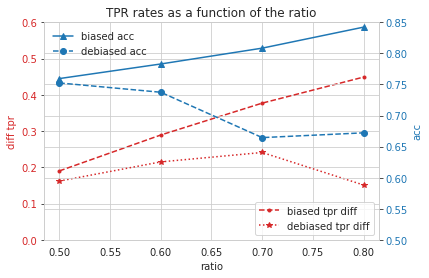

In [57]:
data2plot(plot_results)

In [58]:
results

defaultdict(dict,
            {0.5: {'p_acc': 0.517,
              'biased_diff_tpr': 0.19000000000000006,
              'debiased_diff_tpr': 0.16200000000000003,
              'biased_acc': 0.7595,
              'debiased_acc': 0.7525},
             0.6: {'p_acc': 0.6165,
              'biased_diff_tpr': 0.2891666666666667,
              'debiased_diff_tpr': 0.21500000000000008,
              'biased_acc': 0.783,
              'debiased_acc': 0.7375},
             0.7: {'p_acc': 0.623,
              'biased_diff_tpr': 0.3771428571428571,
              'debiased_diff_tpr': 0.24095238095238097,
              'biased_acc': 0.8085,
              'debiased_acc': 0.6645},
             0.8: {'p_acc': 0.6331331331331331,
              'biased_diff_tpr': 0.44906407035175877,
              'debiased_diff_tpr': 0.15108668341708542,
              'biased_acc': 0.8423423423423423,
              'debiased_acc': 0.6721721721721722}})

In [59]:
print('Ratio & Sentiment (Acc) & Sentiment + INLP (Acc) & Diff TPR & Diff TPR + INLP')
for ratio, vals in results.items():
    print('{} \t {:.2f} & \t {:.2f} & \t\t {:.2f} & \t\t {:.2f}'
          .format(ratio, vals['biased_acc'], vals['debiased_acc'], vals['biased_diff_tpr'], vals['debiased_diff_tpr'], '.2f'))

Ratio & Sentiment (Acc) & Sentiment + INLP (Acc) & Diff TPR & Diff TPR + INLP
0.5 	 0.76 & 	 0.75 & 		 0.19 & 		 0.16
0.6 	 0.78 & 	 0.74 & 		 0.29 & 		 0.22
0.7 	 0.81 & 	 0.66 & 		 0.38 & 		 0.24
0.8 	 0.84 & 	 0.67 & 		 0.45 & 		 0.15


##Bias Bios

In [60]:
%cd /content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias


In [61]:
!pwd

/content/drive/MyDrive/MLsec_project/BiasMitigation/LM_bias


In [62]:
!git clone https://github.com/microsoft/biosbias.git

Cloning into 'biosbias'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [63]:
!pip install warcio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.7 MB/s 


In [64]:
!pip install Pebble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
!ls

biosbias  images   nlg-bias		 README.md  src
data	  LICENSE  nullspace_projection  res


In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
sys.path.append("../data/embeddings")
sys.path.append("../data/biasbios")
sys.path.append("../data/embeddings/biasbios")
import classifier
import debias
import gensim
import codecs
import json
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
import numpy as np
import random
import sklearn
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import DictVectorizer
from pytorch_transformers import BertTokenizer, BertModel, BertForMaskedLM

import scipy
from scipy import linalg
from scipy import sparse
from scipy.stats.stats import pearsonr
import tqdm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, SGDRegressor, Perceptron, LogisticRegression

%matplotlib inline
matplotlib.rcParams['agg.path.chunksize'] = 10000

import warnings
warnings.filterwarnings("ignore")

import pickle
from collections import defaultdict, Counter
from typing import List, Dict

import torch
from torch import utils

import pytorch_lightning as pl
from pytorch_lightning import Trainer
import copy
import pandas as pd
from gensim.models import FastText
import time
from gensim.scripts.glove2word2vec import glove2word2vec

STOPWORDS = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])



In [ ]:
def load_dataset(path):
    
    with open(path, "rb") as f:
        
        data = pickle.load(f)
    return data

def load_dictionary(path):
    
    with open(path, "r", encoding = "utf-8") as f:
        
        lines = f.readlines()
        
    k2v, v2k = {}, {}
    for line in lines:
        
        k,v = line.strip().split("\t")
        v = int(v)
        k2v[k] = v
        v2k[v] = k
    
    return k2v, v2k
    
def count_profs_and_gender(data: List[dict]):
    
    counter = defaultdict(Counter)
    for entry in data:
        gender, prof = entry["g"], entry["p"]
        counter[prof][gender] += 1
        
    return counter



In [ ]:
train = load_dataset("../data/biasbios/train.pickle")
dev = load_dataset("../data/biasbios/dev.pickle")
test = load_dataset("../data/biasbios/test.pickle")
counter = count_profs_and_gender(train+dev+test)
p2i, i2p = load_dictionary("../data/biasbios/profession2index.txt")
g2i, i2g = load_dictionary("../data/biasbios/gender2index.txt")

path = "../data/biasbios/"
x_train = np.load(path + "train_cls.npy")
x_dev = np.load(path + "dev_cls.npy")
x_test = np.load(path + "test_cls.npy")

assert len(train) == len(x_train)
assert len(dev) == len(x_dev)
assert len(test) == len(x_test)

f,m = 0., 0.
prof2fem = dict()

for k, values in counter.items():
    f += values['f']
    m += values['m']
    prof2fem[k] = values['f']/(values['f'] + values['m'])

print(f / (f + m))
print(prof2fem)



In [ ]:
y_train = np.array([p2i[entry["p"]] for entry in train])
y_dev = np.array([p2i[entry["p"]] for entry in dev])
y_test = np.array([p2i[entry["p"]] for entry in test])


In [ ]:
train[1]

In [ ]:
train[1]={'g': 'f',
 'p': 'chiropractor',
 'text': "Dr. David A Schultz is a male Chiropractor (taxonomy code 111N00000X) located in Lucedale, Mississippi. Dr. David A Schultz's NPI Number is #1417984022 and has been listed in the NPI registry for 10 years. Dr. David A Schultz's practice location is listed as: 789 Winter St. Lucedale, MS 39452 and can be reached via phone at (601) 947-8472.",
 'start': 103,
 'hard_text': "Dr. David A Schultz's NPI Number is #1417984022 and has been listed in the NPI registry for 10 years. Dr. David A Schultz's practice location is listed as: 789 Winter St. Lucedale, MS 39452 and can be reached via phone at (601) 947-8472.",
 'text_without_gender': "Dr. _ _ _'s NPI Number is #1417984022 and has been listed in the NPI registry for 10 years. Dr. _ _ _'s practice location is listed as: 789 Winter St. Lucedale, _ 39452 and can be reached via phone at (601) 947-8472.",
 'hard_text_tokenized': "Dr. David A Schultz 's NPI Number is # 1417984022 and has been listed in the NPI registry for 10 years . Dr. David A Schultz 's practice location is listed as : 789 Winter St. Lucedale , MS 39452 and can be reached via phone at ( 601 ) 947 - 8472 ."}

In [ ]:
random.seed(0)
np.random.seed(0)

clf = LogisticRegression(warm_start = True, penalty = 'l2',
                         solver = "saga", multi_class = 'multinomial', fit_intercept = False,
                         verbose = 5, n_jobs = 90, random_state = 1, max_iter = 7)

#params = {'}
#clf = SGDClassifier(loss= 'hinge', max_iter = 4000, fit_intercept= True, class_weight= None, n_jobs= 100)
        
        
start = time.time()
idx = np.random.rand(x_train.shape[0]) < 1.0
clf.fit(x_train[idx], y_train[idx])
print("time: {}".format(time.time() - start))
print(clf.score(x_test, y_test))
clf_original = copy.deepcopy(clf)


In [ ]:
print(clf.score(x_train, y_train))

###INLP

In [ ]:
MLP = False

def get_projection_matrix(num_clfs, X_train, Y_train_gender, X_dev, Y_dev_gender, Y_train_task, Y_dev_task, dim):

    is_autoregressive = True
    min_acc = 0.
    #noise = False
    dim = 768
    n = num_clfs
    #random_subset = 1.0
    start = time.time()
    TYPE= "svm"
    
    
    if MLP:
        x_train_gender = np.matmul(x_train, clf.coefs_[0]) + clf.intercepts_[0]
        x_dev_gender = np.matmul(x_dev, clf.coefs_[0]) + clf.intercepts_[0]
    else:
        x_train_gender = x_train.copy()
        x_dev_gender = x_dev.copy()
        
    
    if TYPE == "sgd":
        gender_clf = SGDClassifier
        params = {'loss': 'hinge', 'penalty': 'l2', 'fit_intercept': False, 'class_weight': None, 'n_jobs': 32}
    else:
        gender_clf = LinearSVC
        params = {'penalty': 'l2', 'C': 0.01, 'fit_intercept': True, 'class_weight': None, "dual": False}
        
    P,rowspace_projections, Ws = debias.get_debiasing_projection(gender_clf, params, n, dim, is_autoregressive, min_acc,
                                              X_train, Y_train_gender, X_dev, Y_dev_gender,
                                       Y_train_main=Y_train_task, Y_dev_main=Y_dev_task, by_class = True)
    print("time: {}".format(time.time() - start))
    return P,rowspace_projections, Ws



num_clfs = 300
y_dev_gender = np.array([g2i[d["g"]] for d in dev])
y_train_gender = np.array([g2i[d["g"]] for d in train])
idx = np.random.rand(x_train.shape[0]) < 1.
P,rowspace_projections, Ws = get_projection_matrix(num_clfs, x_train[idx], y_train_gender[idx], x_dev, y_dev_gender, y_train, y_dev, 300)


In [ ]:
def get_TPR(y_pred, y_true, p2i, i2p, gender):
    
    scores = defaultdict(Counter)
    prof_count_total = defaultdict(Counter)
    
    for y_hat, y, g in zip(y_pred, y_true, gender):
        
        if y == y_hat:
            
            scores[i2p[y]][g] += 1
        
        prof_count_total[i2p[y]][g] += 1
    
    tprs = defaultdict(dict)
    tprs_change = dict()
    tprs_ratio = []
    
    for profession, scores_dict in scores.items():
        
        good_m, good_f = scores_dict["m"], scores_dict["f"]
        prof_total_f = prof_count_total[profession]["f"]
        prof_total_m = prof_count_total[profession]["m"]
        tpr_m = (good_m) / prof_total_m
        tpr_f = (good_f) / prof_total_f
        
        tprs[profession]["m"] = tpr_m
        tprs[profession]["f"] = tpr_f
        tprs_ratio.append(0)
        tprs_change[profession] = tpr_f - tpr_m
        
    return tprs, tprs_change, np.mean(np.abs(tprs_ratio))

def get_FPR2(y_pred, y_true, p2i, i2p, y_gender):
    
    fp = defaultdict(Counter)
    neg_count_total = defaultdict(Counter)
    pos_count_total = defaultdict(Counter)    


    label_set = set(y_true)
    # count false positive per gender & class
    
    for y_hat, y, g in zip(y_pred, y_true, y_gender):
        
        if y != y_hat:
            
            fp[y_hat][g] += 1 # count false positives for y_hat
    
    # count total falses per gender (conditioned on class)
    
    total_prof_g = defaultdict(Counter)
    
    # collect POSITIVES for each profession and gender
    
    for y,g in zip(y_true, y_gender):
        total_prof_g[y][g] += 1
    
    total_m = sum([total_prof_g[y]["m"] for y in label_set])
    total_f = sum([total_prof_g[y]["f"] for y in label_set])
    
    # calculate NEGATIVES for each profession and gender
    
    total_false_prof_g = defaultdict(Counter)    
    for y in label_set:
        total_false_prof_g[y]["m"] = total_m - total_prof_g[y]["m"]
        total_false_prof_g[y]["f"] = total_f - total_prof_g[y]["f"]
    
    fprs = defaultdict(dict)
    fprs_diff = dict()
    
    for profession, false_pred_dict in fp.items():

        false_male, false_female = false_pred_dict["m"],  false_pred_dict["f"]
        prof_total_false_for_male = total_false_prof_g[profession]["m"]
        prof_total_false_for_female = total_false_prof_g[profession]["f"]
        
        ftr_m = false_male/prof_total_false_for_male
        ftr_f = false_female/prof_total_false_for_female
        fprs[i2p[profession]]["m"] = ftr_m
        fprs[i2p[profession]]["f"] = ftr_f
        fprs_diff[i2p[profession]] = ftr_m - ftr_f
    
    return fprs, fprs_diff
        

    
def similarity_vs_tpr(tprs, word2vec, title, measure, prof2fem):
    
    professions = list(tprs.keys())
    #
    """ 
    sims = dict()
    gender_direction = word2vec["he"] - word2vec["she"]
    
    for p in professions:
        sim = word2vec.cosine_similarities(word2vec[p], [gender_direction])[0]
        sims[p] = sim
    """
    tpr_lst = [tprs[p] for p in professions]
    sim_lst = [prof2fem[p] for p in professions]

    #professions = [p.replace("_", " ") for p in professions if p in word2vec]
    
    plt.plot(sim_lst, tpr_lst, marker = "o", linestyle = "none")
    plt.xlabel("% women", fontsize = 13)
    plt.ylabel(r'$GAP_{female,y}^{TPR}$', fontsize = 13)
    for p in professions:
        x,y = prof2fem[p], tprs[p]
        plt.annotate(p , (x,y), size = 7, color = "red")
    plt.ylim(-0.4, 0.55)
    z = np.polyfit(sim_lst, tpr_lst, 1)
    p = np.poly1d(z)
    plt.plot(sim_lst,p(sim_lst),"r--")
    plt.savefig("{}_vs_bias_{}_bert".format(measure, title), dpi = 600)
    print("Correlation: {}; p-value: {}".format(*pearsonr(sim_lst, tpr_lst)))
    plt.show()

def rms_diff(tpr_diff):
    
    return np.sqrt(np.mean(tpr_diff**2))
    
def save_vecs_and_words(vecs, words):
    def to_string(arr):
        return "\t".join([str(x) for x in arr])
    
    with open("vecs.txt", "w") as f:
        for v in vecs:
            assert len(v) == 300
            f.write(to_string(v) + "\n")
    
    with open("labels.txt", "w") as f:
            f.write("Profession\n")
            for w in words:
                f.write(w + "\n")

###Finetune

In [ ]:
clf = LogisticRegression(warm_start = True, penalty = 'l2',
                         solver = "sag", multi_class = 'multinomial', fit_intercept = True,
                         verbose = 10, max_iter = 3, n_jobs = 64, random_state = 1)
#clf = SGDClassifier()
P_rowspace = np.eye(768) - P
mean_gender_vec = np.mean(P_rowspace.dot(x_train.T).T, axis = 0)
# 2
print(clf.fit((P.dot(x_train.T)).T, y_train))
#print(clf.fit((x_train.T).T + mean_gender_vec, y_train))


In [ ]:
print(clf.score((P.dot(x_test.T)).T, y_test))
#print(clf.score(x_test.dot(P), y_test))
#print(clf_original.score(x_test, y_test))


###TPR Gap

In [ ]:
y_pred_before = clf_original.predict(x_test)
test_gender = [d["g"] for d in test]
tprs_before, tprs_change_before, mean_ratio_before = get_TPR(y_pred_before, y_test, p2i, i2p, test_gender)
similarity_vs_tpr(tprs_change_before, None, "before", "TPR", prof2fem)


y_pred_after = clf.predict((P.dot(x_test.T)).T)
#y_pred_after = clf.predict(X_test)
tprs, tprs_change_after, mean_ratio_after = get_TPR(y_pred_after, y_test, p2i, i2p, test_gender)
similarity_vs_tpr(tprs_change_after, None, "after", "TPR", prof2fem)

 
""" 
#print("TPR diff ratio before: {}; after: {}".format(mean_ratio_before, mean_ratio_after))
 
fprs_before, fprs_change_before = get_FPR2(y_pred_before, y_dev, p2i, i2p, test_gender)
similarity_vs_tpr(fprs_change_before, None, "before", "FPR", prof2fem)


fprs, fprs_change_after = get_FPR2(y_pred_after, y_dev, p2i, i2p, test_gender)
similarity_vs_tpr(fprs_change_after, None, "after", "FPR", prof2fem)

#print("TPR diff ratio before: {}; after: {}".format(mean_ratio_before, mean_ratio_after))
"""
change_vals_before = np.array(list((tprs_change_before.values())))
change_vals_after = np.array(list(tprs_change_after.values()))

print("rms-diff before: {}; rms-diff after: {}".format(rms_diff(change_vals_before), rms_diff(change_vals_after)))


###T-SNE by Gender

In [ ]:
def tsne_by_gender(vecs, labels, title, words = None):

  tsne = TSNE(n_components=2, random_state=0)
  vecs_2d = tsne.fit_transform(vecs)
  num_labels = len(set(labels.tolist()))

  names = list(set(labels)) # ["class {}".format(i) for i in range(num_labels)]
  plt.figure(figsize=(6, 5))
  colors = 'b', 'r', 'orange'
  markers = ["o", "s"]

  for i, c, label, marker in zip(set(labels.tolist()), colors, names, markers):
    print(len(vecs_2d[labels == i, 0]))
    plt.scatter(vecs_2d[labels == i, 0], vecs_2d[labels == i, 1], c=c,
                label="Female" if label == 1 else "Male", alpha = 0.45, marker = marker)
  plt.legend(fontsize = 15, loc = "upper right")
  plt.title(title, fontsize = 15)
  
  if words is not None:
        k = 60
        for i in range(k):
            
            j = np.random.choice(range(len(words)))
            label = labels[i]
            w = words[j]
            x,y = vecs_2d[i]
            plt.annotate(w , (x,y), size = 10, color = "black" if label == 1 else "black")
  plt.savefig(title, dpi = 600)          
  plt.show()
  return vecs_2d


     

In [ ]:
y_test_gender = np.array([d["g"] for d in dev])
n = 2000
for prof in ["nurse", "professor", "physician", "accountant", "dj", "dietitian"]:
    
    idx = np.random.rand(x_test.shape[0]) < 0.1
    prof_idx = y_dev == p2i[prof]  
    prof_upper = prof[0].upper() + prof[1:]
    tsne_by_gender(x_dev[prof_idx][:n], y_dev_gender[prof_idx][:n], "{} (Original)".format(prof_upper))
    tsne_by_gender((x_dev[prof_idx].dot(P))[:n], y_dev_gender[prof_idx][:n], "{} (Projected)".format(prof_upper))


     